In [1]:
import os

# Print the current working directory
print("Current working directory:", os.getcwd())

# List the files in your current directory
print("Files in the root directory:", os.listdir())

# Check inside `sample_data`
if os.path.exists('sample_data'):
    print("Contents of 'sample_data':", os.listdir('sample_data'))
else:
    print("❌ 'sample_data' directory does not exist!")


Current working directory: /content
Files in the root directory: ['.config', 'drive', 'sample_data']
Contents of 'sample_data': ['README.md', 'anscombe.json', 'california_housing_test.csv', 'mnist_train_small.csv', 'california_housing_train.csv', 'mnist_test.csv']


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import files

uploaded = files.upload()

Saving fire_dataset.zip to fire_dataset.zip


In [5]:
import zipfile
import os

# Define the filename of the uploaded zip file (modify if needed)
zip_filename = "fire_dataset.zip"

# Extract the dataset
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("sample_data/")  # Extract to sample_data directory
    print(f"Extracted {zip_filename} to 'sample_data/'")


Extracted fire_dataset.zip to 'sample_data/'


In [6]:
# Unzip the dataset
zip_file = "fire_dataset.zip"  # Replace with the actual zip filename

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("sample_data/")  # Extract into sample_data directory

print("✅ Dataset extracted successfully!")

✅ Dataset extracted successfully!


In [11]:
fire_dir = "sample_data/fire_dataset/fire_images"
nonfire_dir = "sample_data/fire_dataset/non_fire_images"

In [12]:
import os
import numpy as np
import cv2  # OpenCV for image processing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [13]:
# Define image size
IMG_SIZE = 128  # Resize all images to 128x128

# Function to load images from a directory
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)  # Read image
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 128x128
            img = img / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(label)
    return images, labels

# Load fire images (label = 1)
fire_images, fire_labels = load_images_from_folder(fire_dir, label=1)

# Load non-fire images (label = 0)
nonfire_images, nonfire_labels = load_images_from_folder(nonfire_dir, label=0)

# Combine datasets
X = np.array(fire_images + nonfire_images)
y = np.array(fire_labels + nonfire_labels)

# Convert labels to categorical (optional for multi-class classification)
y = to_categorical(y, num_classes=2)  # Two classes: Fire (1), Non-Fire (0)

print(f"Dataset Loaded: {X.shape[0]} images, Image Shape: {X.shape[1:]}")


Dataset Loaded: 998 images, Image Shape: (128, 128, 3)


In [14]:
# Split dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}, Validation Samples: {X_val.shape[0]}")


Training Samples: 798, Validation Samples: 200


In [15]:
# Define a CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Output 2 neurons for 'Fire' and 'Non-Fire'
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
epochs = 10  # Adjust as needed
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    validation_data=(X_val, y_val),
    batch_size=32
)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8069 - loss: 0.4656 - val_accuracy: 0.9300 - val_loss: 0.2100
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9482 - loss: 0.1634 - val_accuracy: 0.9650 - val_loss: 0.1464
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9606 - loss: 0.1147 - val_accuracy: 0.9700 - val_loss: 0.1661
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9520 - loss: 0.1331 - val_accuracy: 0.9550 - val_loss: 0.1112
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9565 - loss: 0.1122 - val_accuracy: 0.9400 - val_loss: 0.1775
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9535 - loss: 0.1129 - val_accuracy: 0.9700 - val_loss: 0.1700
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9691 - loss: 0.0919 - val_accuracy: 0.9600 - val_loss: 0.1044
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9794 - loss: 0.0550 - val_accuracy: 0.9650 - val_loss:

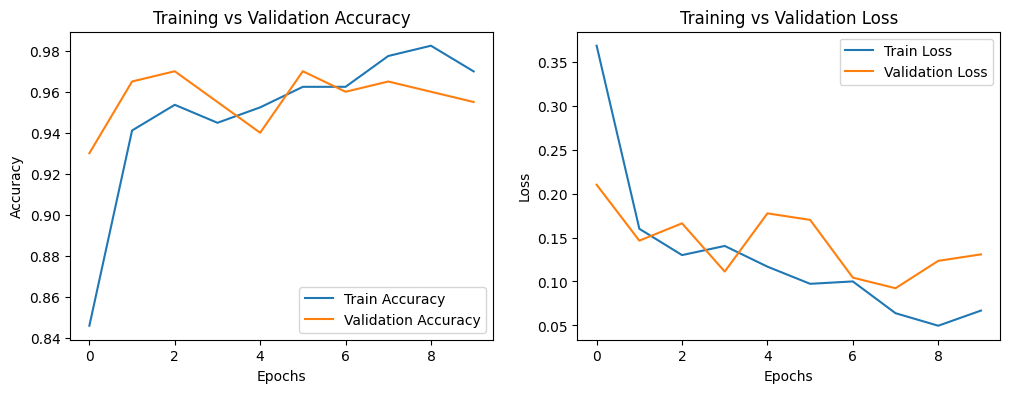

In [17]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")

plt.show()


In [18]:
model.save("fire_detection_model.h5")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [19]:
from google.colab import files

uploaded = files.upload()  # Upload your test image

Saving test_image.jpg to test_image.jpg


In [20]:
def predict_fire(img_path, model):
    img = cv2.imread(img_path)

    # Check if image is loaded
    if img is None:
        print(f"❌ Error: Unable to load image at '{img_path}'. Check the file path!")
        return None

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)
    class_label = "🔥 Fire" if np.argmax(prediction) == 1 else "❌ Non-Fire"

    return class_label

# Example usage
test_image_path = "test_image.jpg"
print(f"Prediction: {predict_fire(test_image_path, model)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Prediction: 🔥 Fire


In [21]:
from google.colab import files

uploaded = files.upload()  # Upload your test image

Saving test_image_2.jpg to test_image_2.jpg


In [22]:
def predict_fire(img_path, model):
    img = cv2.imread(img_path)

    # Check if image is loaded
    if img is None:
        print(f"❌ Error: Unable to load image at '{img_path}'. Check the file path!")
        return None

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)
    class_label = "🔥 Fire" if np.argmax(prediction) == 1 else "❌ Non-Fire"

    return class_label

# Example usage
test_image_path = "test_image_2.jpg"
print(f"Prediction: {predict_fire(test_image_path, model)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction: ❌ Non-Fire
